Set 집합
- 중복을 허용하지 않는다
- 순서를 보장하지 않는다

In [ ]:
setStructure = set()
# set은 {} 중괄호를 사용 but => 이렇게 하면 dictionary를 선언하는 것이기에 헷갈리지 말자

### Set의 원소 제거
- 없는 원소를 삭제하려고 하면 error
```python
print(setStructure)
Out : {1, 2, 3, 4} # 이미 1,2,3,4 네개의 원소가 있는 상태
setStructure.remove(4)
print(setStructure)
Out : {1, 2, 3} # 4 원소가 잘 삭제되었다.
setStructure.remove(4)
KeyError : 4
```
- 있든 없든 무조건 삭제가 되었으면 한다면면 discard
```python
print(setStructure)
Out : {1, 2, 3, 4} # 이미 1,2,3,4 네개의 원소가 있는 상태
setStructure.discard(4)
print(setStructure)
Out : {1, 2, 3} # 4 원소가 잘 삭제되었다.
setStructure.discard(4)
print(setStructure)
Out : {1, 2, 3}
```

- list에서 pop을 하면 가장 마지막에 들어간 값이 가장 먼저 나온다. last in firt out
- set에서는 애초에 add한 순서대로 출력되지도 않는다.(순서가 보장되지 않음) 그리고 pop을 했을 때 가장 앞에 출력된 2가 출력됨을 알 수 있다. 이는 set이 python 내부적으로 hashtable data structure로 구성되어 있기 때문이다.
```python
popSet = set()
popSet.add(-3)
popSet.add(-1)
popSet.add(2)
print(popSet)
Out : {2, -3, -1}
print(popSet.pop())
Out : 2
```



- python의 set, dict 객체는 모두 hashtable data structure이다.
- 둘의 차이는 set는 value가 존재하지 않고 Key만 존재하는 데이터 구조이고, dict는 key, value가 매핑되어있는 데이터 구조이다. 그럼 그 구조차이는 어디에서 오는가?
- dictionary에는 value를 가르키는 주소값이 추가로 저장되어 있고 setentry에는 value없이 key만 저장하고 있음을 알 수 있다.

- set에서 pop하면?
- hash table을 구현해보면 알겠지만 hash table을 순회하면 첫번째 bucket부터 안의 키를 순회하고 다음 bucket으로 가는 식으로 순회한다.
- 이렇게 순회를 하니 pop을 한다고 가장 뒤에 있는 값까지 순회해서 내뱉는 것이 아닌 가장 처음에 나온 값을 뱉게되는 것이다

> list
- 순서가 중요할 때(set, dict는 순서없음)

> set
- 중복없이 특정값이 이미 있는지 여부만 알면되고 순서는 필요없을 때

> dict
- key와 함께 value가 필요할 때(list, set은 key, value mapping 없음) 그리고 그 값을 효과적으로 찾고싶을 때

### Hash table 이란?
- 해시 테이블은 (Key, Value)로 데이터를 저장하는 자료구조 중 하나로 빠르게 데이터를 검색할 수 있는 자료구조이다.

- 해시 테이블이 빠른 검색속도를 제공하는 이유는 내부적으로 배열(버킷)을 사용하여 데이터를 저장하기 때문이다.
- 해시 테이블은 각각의 Key값에 해시함수를 적용해 배열의 고유한 index를 생성하고, 이 index를 활용해 값을 저장하거나 검색하게 된다. 여기서 실제 값이 저장되는 장소를 버킷 또는 슬롯이라고 한다.

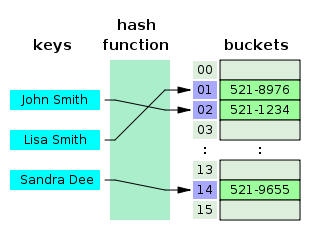

- 예를 들어 우리가 (Key, Value)가 ("John Smith", "521-1234")인 데이터를 크기가 16인 해시 테이블에 저장한다고 하자. 그러면 먼저 index = hash_function("John Smith") % 16 연산을 통해 index 값을 계산한다. 그리고 array[index] = "521-1234" 로 전화번호를 저장하게 된다.
- 이러한 해싱 구조로 데이터를 저장하면 Key값으로 데이터를 찾을 때 해시 함수를 1번만 수행하면 되므로 매우 빠르게 데이터를 저장/삭제/조회할 수 있다. 해시테이블의 평균 시간복잡도는 O(1)이다.

## Hash 함수(해시 함수)

- 해시 함수에서 중요한 것은 고유한 인덱스 값을 설정하는 것이다. 해시 테이블에 사용되는 대표적인 해시 함수로는 아래의 3가지가 있다.

1. Division Method: 나눗셈을 이용하는 방법으로 입력값을 테이블의 크기로 나누어 계산한다.( 주소 = 입력값 % 테이블의 크기) 테이블의 크기를 소수로 정하고 2의 제곱수와 먼 값을 사용해야 효과가 좋다고 알려져 있다.
2. Digit Folding: 각 Key의 문자열을 ASCII 코드로 바꾸고 값을 합한 데이터를 테이블 내의 주소로 사용하는 방법이다.
3. Multiplication Method: 숫자로 된 Key값 K와 0과 1사이의 실수 A, 보통 2의 제곱수인 m을 사용하여 다음과 같은 계산을 해준다. h(k)=(kAmod1) × m
4. Univeral Hashing: 다수의 해시함수를 만들어 집합 H에 넣어두고, 무작위로 해시함수를 선택해 해시값을 만드는 기법이다.

### 해시(Hash)값이 충돌하는 경우
- 그런데 만약 "John Smith"를 해시 함수를 돌려 나온 값과 "Mang Kyu"를 해시 함수를 돌려 나온 값이 동일하다면 어떻게 해야 할까?
- 해시 테이블에서는 충돌에 의한 문제를 분리 연결법(Separate Chaining)과 개방 주소법(Open Addressing) 크게 2가지로 해결하고 있다.

1. 분리 연결법(Separate Chaining)

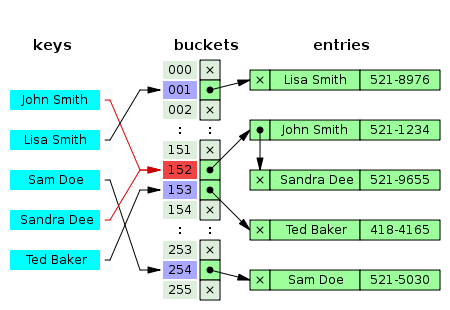

- Separate Chaining이란 동일한 버킷의 데이터에 대해 자료구조를 활용해 추가 메모리를 사용하여 다음 데이터의 주소를 저장하는 것이다. 위의 그림과 같이 동일한 버킷으로 접근을 한다면 데이터들을 연결을 해서 관리해주고 있다.
- 이러한 Chaining 방식은 해시 테이블의 확장이 필요없고 간단하게 구현이 가능하며, 손쉽게 삭제할 수 있다는 장점이 있다. 하지만 데이터의 수가 많아지면 동일한 버킷에 chaining되는 데이터가 많아지며 그에 따라 캐시의 효율성이 감소한다는 단점이 있다.


2. 개방 주소법(Open Addressing)

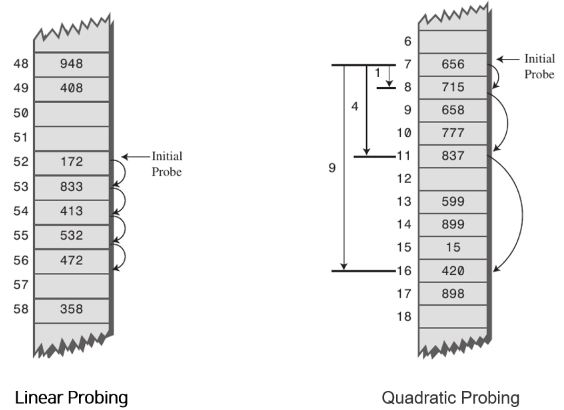

Open Addressing이란 추가적인 메모리를 사용하는 Chaining 방식과 다르게 비어있는 해시 테이블의 공간을 활용하는 방법이다. Open Addressing을 구현하기 위한 대표적인 방법으로는 3가지 방식이 존재한다.


1. Linear Probing: 현재의 버킷 index로부터 고정폭 만큼씩 이동하여 차례대로 검색해 비어 있는 버킷에 데이터를 저장한다.
2. Quadratic Probing: 해시의 저장순서 폭을 제곱으로 저장하는 방식이다. 예를 들어 처음 충돌이 발생한 경우에는 1만큼 이동하고 그 다음 계속 충돌이 발생하면 2^2, 3^2 칸씩 옮기는 방식이다.
3. Double Hashing Probing: 해시된 값을 한번 더 해싱하여 해시의 규칙성을 없애버리는 방식이다. 해시된 값을 한번 더 해싱하여 새로운 주소를 할당하기 때문에 다른 방법들보다 많은 연산을 하게 된다.

- Open Addressing에서 데이터를 삭제하면 삭제된 공간은 Dummy Space로 활용되는데, 그렇기 때문에 Hash Table을 재정리 해주는 작업이 필요하다고 한다.

### 해시테이블(HashTable) 시간복잡도
각각의 Key값은 해시함수에 의해 고유한 index를 가지게 되어 바로 접근할 수 있으므로 평균 O(1)의 시간복잡도로 데이터를 조회할 수 있다. 하지만 데이터의 충돌이 발생한 경우 Chaining에 연결된 리스트들까지 검색을 해야 하므로 O(N)까지 시간복잡도가 증가할 수 있다.
